## Objective — Data Preprocessing & Exploratory Data Analysis (EDA)

- Load and validate structured real-estate tabular data from the raw training dataset.
- Support **dual-mode execution** (sample mode for rapid iteration and full-data mode for final training) using a configurable runtime switch.
- Perform data cleaning by handling missing target values and ensuring schema consistency.
- Select and isolate predictive numerical features relevant to property valuation.
- Analyze statistical distributions and central tendencies of target and feature variables.
- Examine inter-feature and feature-target correlations to understand linear relationships.
- Investigate the spatial distribution of properties using latitude and longitude.
- Generate visual diagnostics to support feature relevance justification.
- Export a clean, model-ready feature matrix (`X`) and target vector (`y`) for downstream training.



In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


USE_SAMPLE = False       # Toggle between sample mode (True) and full dataset (False)
SAMPLE_SIZE = 500       
RANDOM_STATE = 42        # Seed for reproducibility

# Execution mode identifier 
RUN_MODE = "sample" if USE_SAMPLE else "full"




In [5]:

df = pd.read_excel("data/train.xlsx")


df = df.sort_values("id").reset_index(drop=True)


# Optional runtime sampling for faster experimentation

if USE_SAMPLE:
    df = df.iloc[:SAMPLE_SIZE]

df.head()



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,20140916T000000,280000,6,3.00,2400,9373,2.0,0,0,...,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
1,1200019,20140508T000000,647500,4,1.75,2060,26036,1.0,0,0,...,8,1160,900,1947,0,98166,47.4444,-122.351,2590,21891
2,1200021,20140811T000000,400000,3,1.00,1460,43000,1.0,0,0,...,7,1460,0,1952,0,98166,47.4434,-122.347,2250,20023
3,2800031,20150401T000000,235000,3,1.00,1430,7599,1.5,0,0,...,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320
4,3600057,20150319T000000,402500,4,2.00,1650,3504,1.0,0,0,...,7,760,890,1951,2013,98144,47.5803,-122.294,1480,3504


In [6]:

df = df.dropna(subset=["price"])  
df = df.reset_index(drop=True)    


In [7]:

# Defining target variable and selected predictive features

TARGET = "price"

FEATURE_COLS = [
    "bedrooms",
    "bathrooms",
    "sqft_living",
    "lat",
    "long"
]


# Spliting dataset into features (X) and target (y)

X = df[FEATURE_COLS]
y = df[TARGET]



In [8]:

# Validating presence of required feature and target columns

missing_cols = set(FEATURE_COLS + [TARGET]) - set(df.columns)
if missing_cols:
    raise ValueError(f"Missing columns in dataset: {missing_cols}")



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

In [10]:
df.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.620900e+04,1.620900e+04,16209.00000,16209.000000,16209.000000,1.620900e+04,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000
mean,4.575771e+09,5.374703e+05,3.36782,2.113054,2073.274601,1.486767e+04,1.498828,0.006971,0.234253,3.407860,7.652971,1784.754396,288.520205,1971.152755,82.738108,98077.974767,47.560707,-122.214003,1983.152261,12735.572707
std,2.874661e+09,3.603036e+05,0.93327,0.765242,907.009491,3.882570e+04,0.543032,0.083206,0.763152,0.651553,1.171050,821.820844,438.598910,29.372698,397.861148,53.355282,0.138340,0.140093,681.905161,26933.162012
min,1.000102e+06,7.500000e+04,0.00000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.200000e+05,3.00000,1.500000,1430.000000,5.004000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.472500,-122.328000,1480.000000,5098.000000
50%,3.904950e+09,4.500000e+05,3.00000,2.250000,1910.000000,7.599000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572400,-122.230000,1840.000000,7620.000000
75%,7.304301e+09,6.400000e+05,4.00000,2.500000,2550.000000,1.063100e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10053.000000
max,9.900000e+09,7.700000e+06,33.00000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


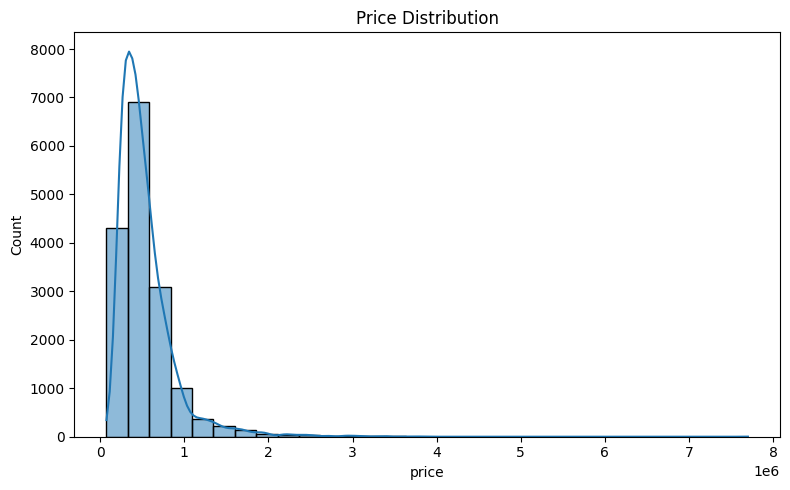

In [11]:

# Visualisation of distribution of property prices

plt.figure(figsize=(8, 5))
sns.histplot(y, bins=30, kde=True)

plt.title("Price Distribution")

plt.tight_layout()
plt.show()


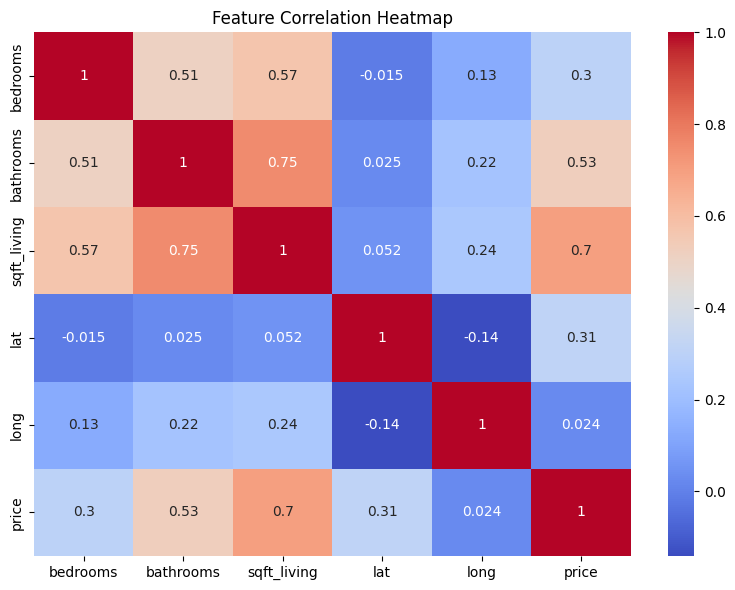

In [12]:

# Visualisation of correlation structure among selected features and target

plt.figure(figsize=(8, 6))
sns.heatmap(
    df[FEATURE_COLS + [TARGET]].corr(),
    annot=True,
    cmap="coolwarm"
)

plt.title("Feature Correlation Heatmap")

plt.tight_layout()
plt.show()


    

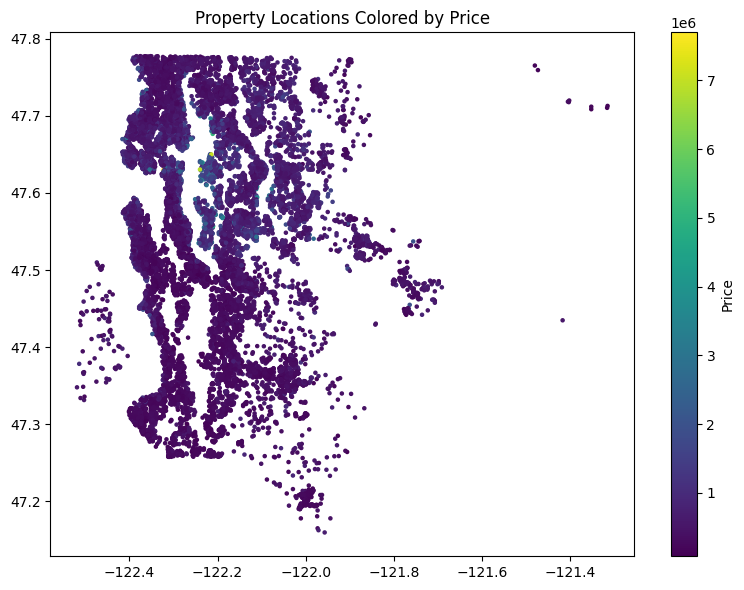

In [13]:

# Visualisation of spatial distribution of properties with price encoding

plt.figure(figsize=(8, 6))

# Scatter plot of longitude vs latitude, colored by property price
plt.scatter(
    df["long"],
    df["lat"],
    c=y,
    cmap="viridis",
    s=5
)


plt.colorbar(label="Price")
plt.title("Property Locations Colored by Price")

plt.tight_layout()
plt.show()





In [14]:

# Exporting processed features and target for downstream model training

X.to_csv(f"data/X_features_{RUN_MODE}.csv", index=False)
y.to_csv(f"data/y_target_{RUN_MODE}.csv", index=False)

print("✅ Preprocessing complete")





✅ Preprocessing complete


## Observations — Key Insights from Preprocessing & EDA

- Property prices exhibit a **right-skewed distribution**, indicating the presence of high-value outliers.
- Size-related features (e.g., `sqft_living`, `bathrooms`) show **strong positive correlation** with property price.
- Geographical coordinates (`lat`, `long`) contribute meaningful but **non-linear spatial influence** on pricing.
- Latitude demonstrates a stronger relationship with price compared to longitude, suggesting location-dependent valuation zones.
- Bedrooms alone have moderate explanatory power, but their effect strengthens when combined with living area.
- Feature correlation analysis indicates limited multicollinearity among selected predictors.
- Spatial scatter plots reveal **price clustering**, supporting the use of location-based proxy features.
- The preprocessing pipeline produces a **consistent, reproducible dataset** across sample and full-data modes.
- Exported datasets (`X_features_*.csv`, `y_target_*.csv`) ensure clean separation between preprocessing and modeling stages.